In [11]:
import pandas as pd

# Load dataset from local CSV file
df = pd.read_csv('/content/AirPassengers.csv')

# Fix column names regardless of CSV format
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

data = df['Passengers']

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARMA(1,1) Summary:
                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -535.037
Date:                Thu, 27 Nov 2025   AIC                           1078.074
Time:                        11:34:34   BIC                           1089.053
Sample:                    01-01-1949   HQIC                          1082.530
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        256.3957     57.377      4.469      0.000     143.939     368.852
ar.L1          0.9469      0.040     23.488      0.000       0.868       1.026
ma.L1          0.4798      0.088 

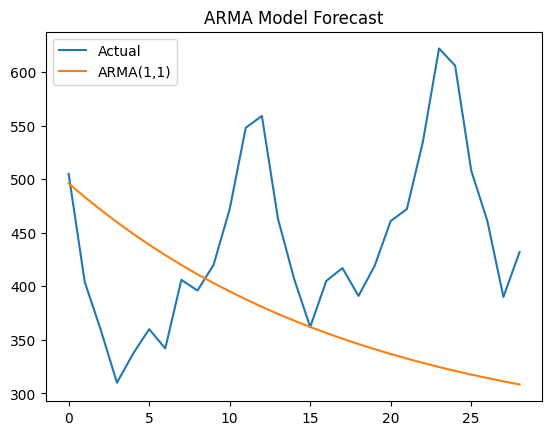

In [16]:
# ============================================================================
# LAB 9: ARMA MODEL
# ============================================================================

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# i. Initialize ARMA model
arma_model = ARIMA(train, order=(1, 0, 1))

# ii. Train the model
arma_fit = arma_model.fit()
print(f"ARMA(1,1) Summary:\n{arma_fit.summary()}")

# iii. Generate forecasts
arma_pred = arma_fit.forecast(steps=len(test))
print("ARMA Metrics:", calc_metrics(test, arma_pred))

plt.plot(test.values, label='Actual')
plt.plot(arma_pred.values, label='ARMA(1,1)')
plt.legend()
plt.title('ARMA Model Forecast')
plt.show()